# `mlarena.utils.plot_utils` Demo

This notebook serves as a demonstration of the various plotting utilities available in the `mlarena.utils.plot_utils` module. 

In [1]:
import mlarena.utils.plot_utils as put
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## boxplot_scatter_overlay()

The `boxplot_scatter_overlay()` function creates a boxplot overlaid with scatter points, providing a detailed view of data distribution and outliers. 

It is useful for visualizing the spread, central tendency, and outliers of data across categories, especially when dealing with dense or overlapping data points.

In the demo below, you will see two examples: one with sparse data, and the another with more dense data, demonstrating how the function handles crowded datasets effectively.

(<Figure size 1000x600 with 1 Axes>,
 <Axes: title={'center': 'Boxplot with Scatter Overlay (Demo for Sparse Data)'}, xlabel='item', ylabel='value'>)

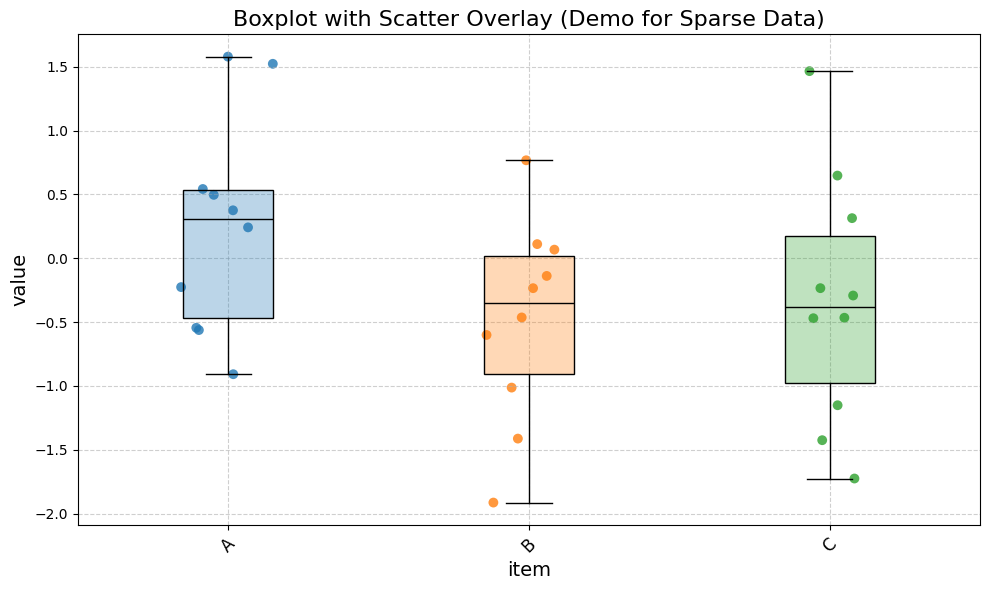

In [2]:
# Create synthetic data that is sparse
np.random.seed(42)
data = {
    "item": ["A", "B", "C"] * 10,
    "value": np.random.randn(30),
}
df = pd.DataFrame(data)
# Create boxplot with scatter overlay
put.boxplot_scatter_overlay(
    data=df,
    x="item",
    y="value",
    title="Boxplot with Scatter Overlay (Demo for Sparse Data)",
)

Below is an example of a denser dataset. You can adjust the `dot_size` parameter to customize the visualization to your preference.

(<Figure size 1000x600 with 1 Axes>,
 <Axes: title={'center': 'Boxplot with Scatter Overlay (Demo for Crowded Data)'}, xlabel='item', ylabel='value'>)

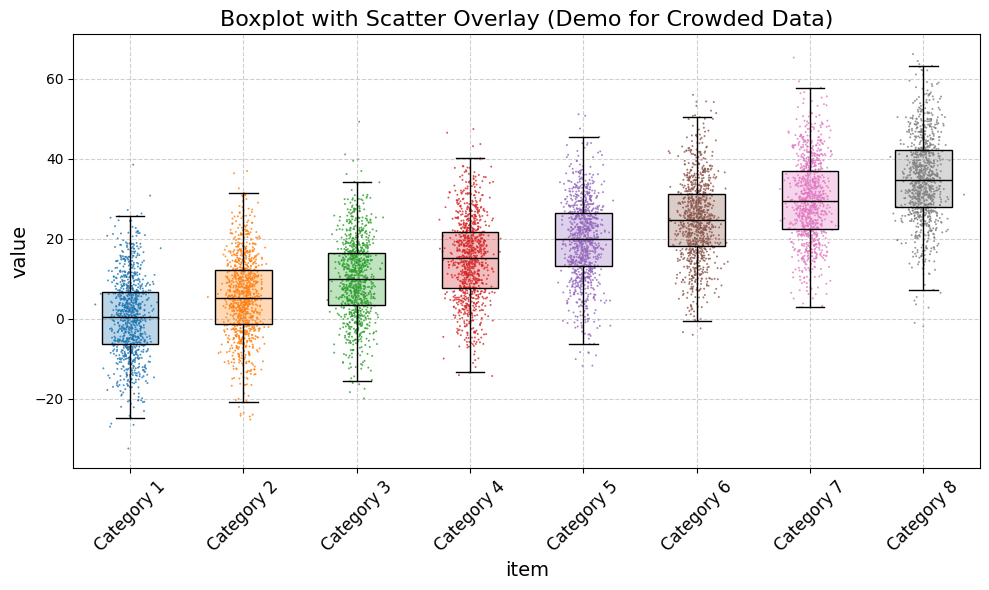

In [3]:
# Create synthetic data that is crowded
num_categories = 8
num_points_per_category = 1000
categories = [f"Category {i + 1}" for i in range(num_categories)]
values = np.concatenate(
    [
        np.random.normal(loc=i * 5, scale=10, size=num_points_per_category)
        for i in range(num_categories)
    ]
)
df_synthetic = pd.DataFrame(
    {"item": np.repeat(categories, num_points_per_category), "value": values}
)
# Create boxplot with scatter overlay
put.boxplot_scatter_overlay(
    data=df_synthetic,
    x="item",
    y="value",
    title="Boxplot with Scatter Overlay (Demo for Crowded Data)",
    dot_size=2,
)

## plot_medical_timeseries()

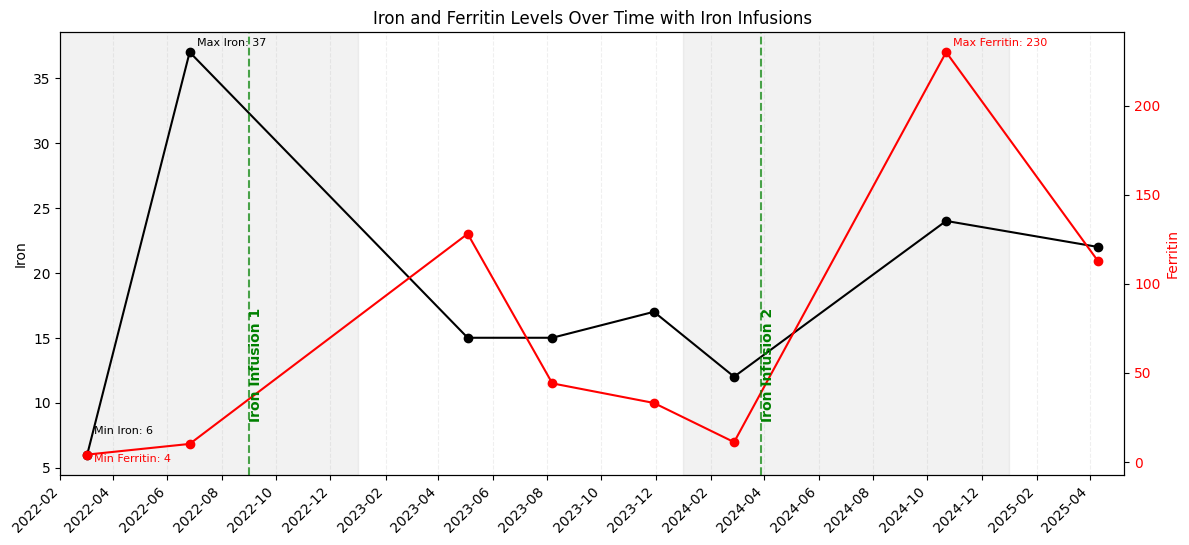

In [4]:
# Example usage:
data = pd.DataFrame(
    {
        "date": [
            "2022-03-03",
            "2022-06-26",
            "2023-05-04",
            "2023-08-07",
            "2023-11-29",
            "2024-02-27",
            "2024-10-22",
            "2025-04-10",
        ],
        "iron": [6, 37, 15, 15, 17, 12, 24, 22],
        "ferritin": [4, 10, 128, 44, 33, 11, 230, 113],
    }
)

metrics = {
    "Iron": {
        "values": "iron",
        #  "color": "blue" 
    },
    "Ferritin": {
        "values": "ferritin",
        #  "color": "darkred" 
    },
}

treatments = {"Iron Infusion": ["2022-09-01", "2024-03-28"]}

fig, axes = put.plot_medical_timeseries(
    data=data,
    date_col="date",
    metrics=metrics,
    treatment_dates=treatments,
    title="Iron and Ferritin Levels Over Time with Iron Infusions",
)
plt.show()

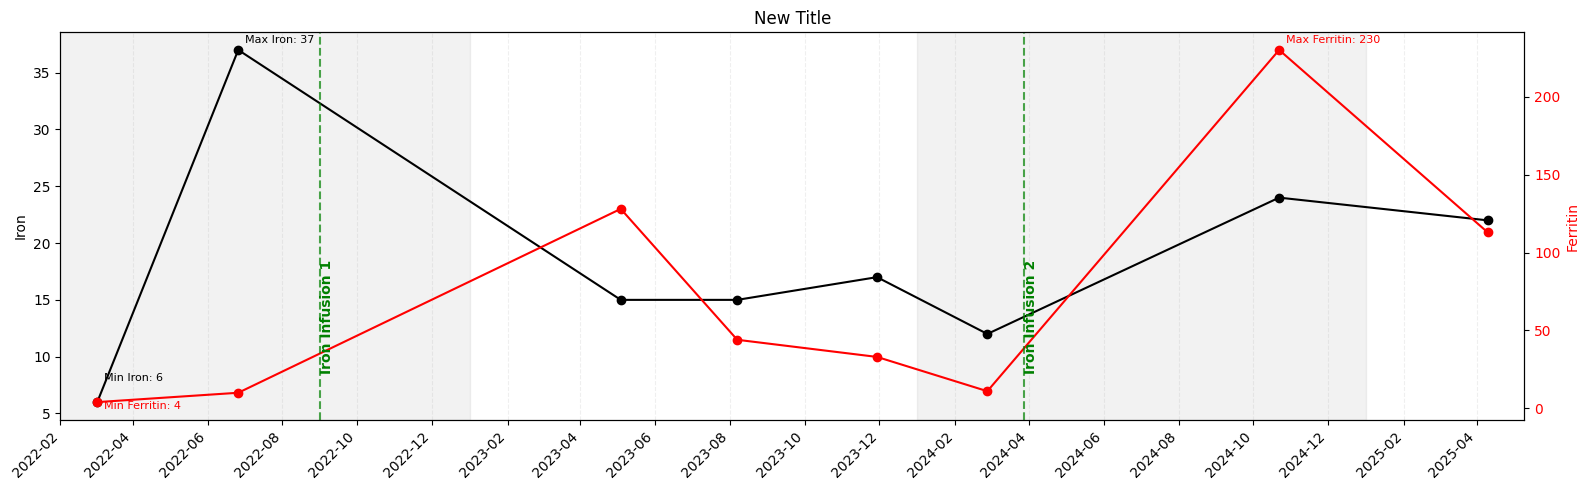

In [5]:
# further customize the figure if desired
fig, axes = put.plot_medical_timeseries(
    data=data,
    date_col="date",
    metrics=metrics,
    treatment_dates=treatments,
    title = "Iron and Ferritin Levels Over Time with Iron Infusions"
)

axes[1].set_title("New Title")
fig.set_size_inches(16, 5)
fig.tight_layout()
# fig.savefig('medical_plot.png', dpi=300, bbox_inches='tight')
plt.show() 


## plot_stacked_bar_over_time()

In [6]:
# Create synthetic data
np.random.seed(42)
dates = pd.date_range(start="2023-01-01", end="2023-12-31", freq="ME")
categories = ['Yes', 'No']
data = []

for date in dates:
    n = np.random.randint(50, 150)
    for _ in range(n):
        data.append({
            'end_date': date,
            'isFraud': np.random.choice(categories, p=[0.3, 0.7])  # 30% fraud, 70% not
        })

# Convert to DataFrame
df_synthetic = pd.DataFrame(data)

# Preview
print(df_synthetic.head())

    end_date isFraud
0 2023-01-31      No
1 2023-01-31      No
2 2023-01-31      No
3 2023-01-31     Yes
4 2023-01-31     Yes


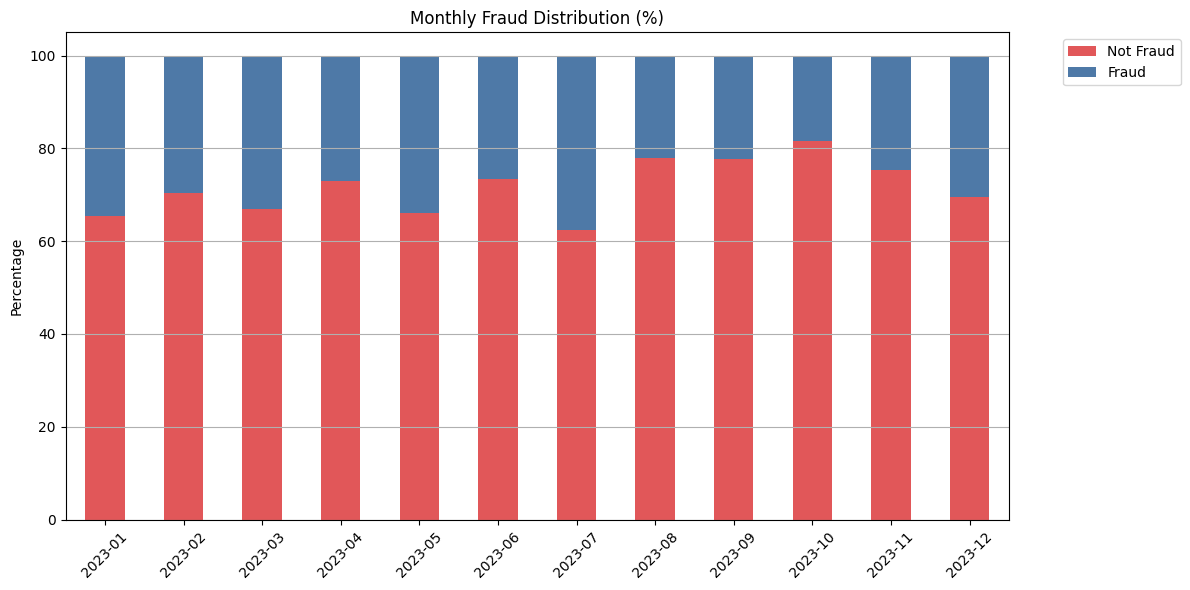

In [7]:
fig, ax = put.plot_stacked_bar_over_time(
    data=df_synthetic,
    date_col='end_date',
    cat_col='isFraud',
    is_pct=True,
    label_dict={'Yes': 'Fraud', 'No': 'Not Fraud'},
    title='Monthly Fraud Distribution (%)',
    xlabel='',
    color_palette=['#E15759', '#4E79A7'] # CoralRed, SteelBlue
)
plt.show()

(<Figure size 1200x600 with 1 Axes>,
 <Axes: title={'center': 'Monthly Fraud Distribution (Count)'}, ylabel='Count'>)

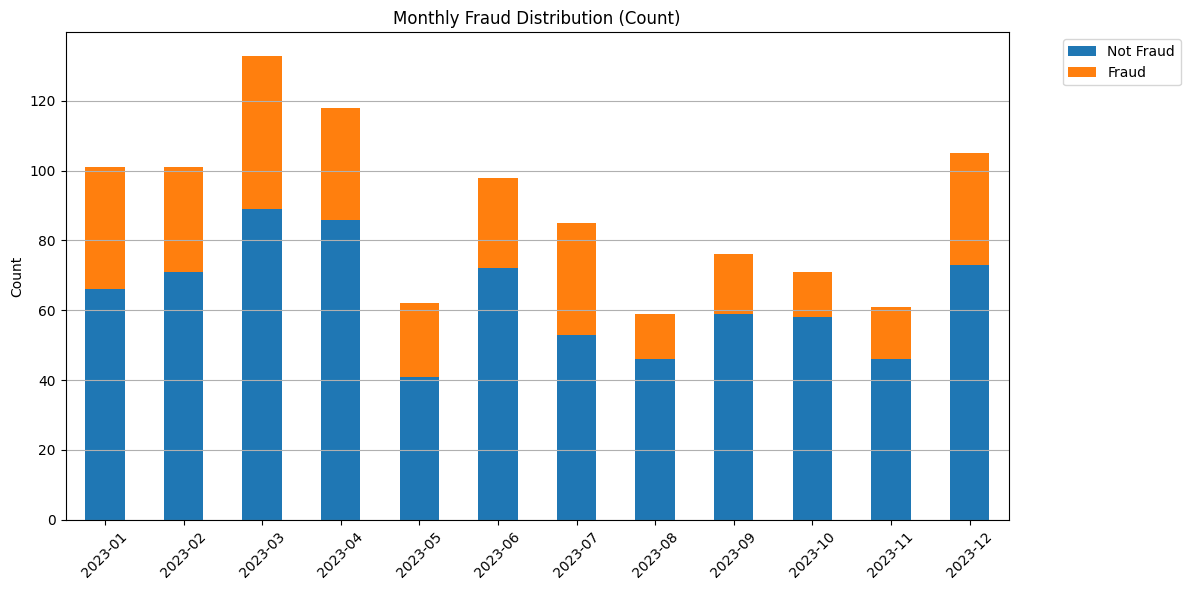

In [8]:
put.plot_stacked_bar_over_time(
    data=df_synthetic,
    date_col='end_date',
    cat_col='isFraud',
    is_pct=False,
    label_dict={'Yes': 'Fraud', 'No': 'Not Fraud'},
    title='Monthly Fraud Distribution (Count)',
    xlabel='',
    # color_palette=['#E15759', '#4E79A7'] 
)